In [904]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

Importing the Weather Dataset

In [905]:
df = pd.read_csv(r"C:\Users\sunje\PycharmProjects\WeatherPrediction\.venv\WeatherPredictionML\Dataset/weather_dataset.csv")

Checking the Dataset

In [906]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


Dropping the Unnecessary Columns

In [907]:
df.drop(["date"], inplace=True, axis=1)

In [908]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
0,0.0,12.8,5.0,4.7,drizzle
1,10.9,10.6,2.8,4.5,rain
2,0.8,11.7,7.2,2.3,rain
3,20.3,12.2,5.6,4.7,rain
4,1.3,8.9,2.8,6.1,rain


In [909]:
df.shape

(1461, 5)

In [910]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [911]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


Checking the Weather Class with their Corresponding Number of rows.

In [912]:
df[["weather"]].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

Checking if the Dataset has any NA or NULL values.

In [913]:
df.isna().sum()

precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

<Axes: >

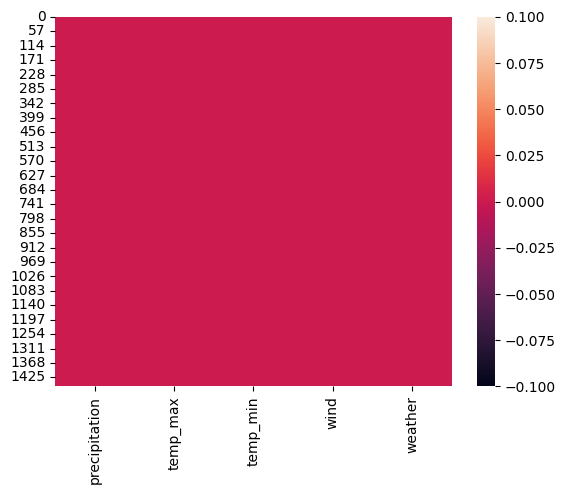

In [914]:
sns.heatmap(df.isnull())

<Axes: >

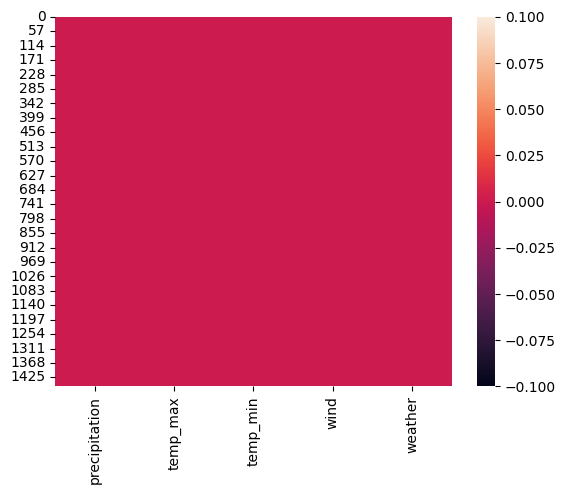

In [915]:
sns.heatmap(df.isna())

The Dataset has a total of 1461 Rows.

<Axes: >

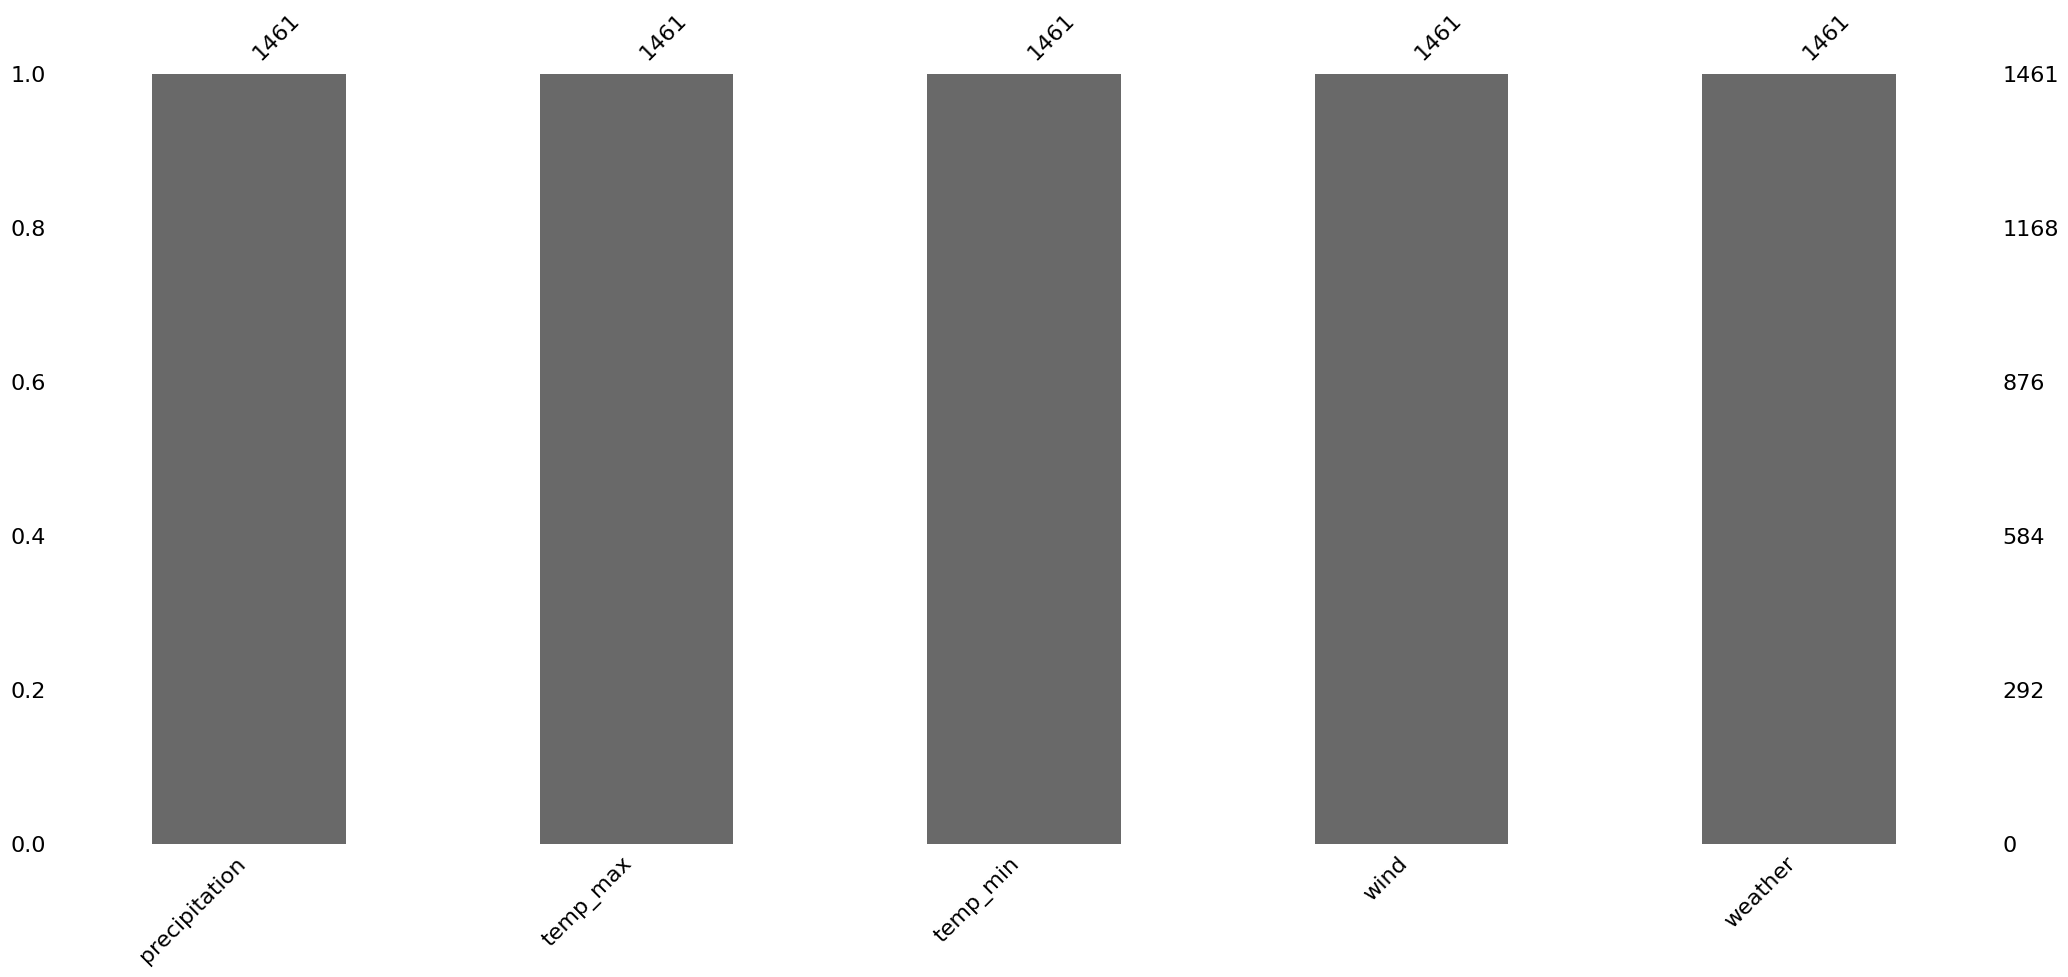

In [916]:
msno.bar(df)

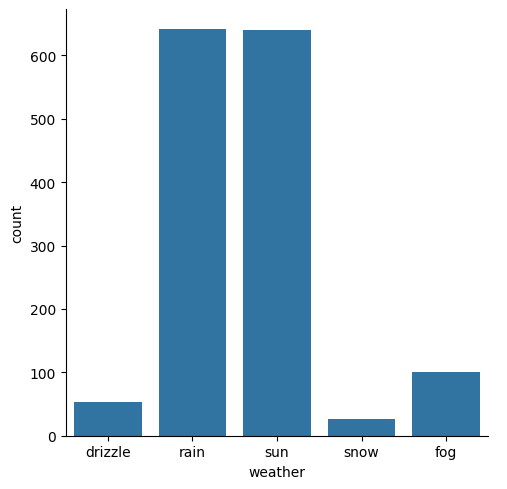

In [917]:
sns.catplot(x="weather", data=df, kind="count")

Replacing Each Class in the Weather Column to a Numeric Value 0, 1, 2, 3 and 4

In [918]:
df.weather = df.weather.replace({"drizzle": 0, "rain": 1, "sun": 2, "snow": 3, "fog": 4})

C:\Users\sunje\AppData\Local\Temp\ipykernel_7488\2064994455.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.weather = df.weather.replace({"drizzle": 0, "rain": 1, "sun": 2, "snow": 3, "fog": 4})


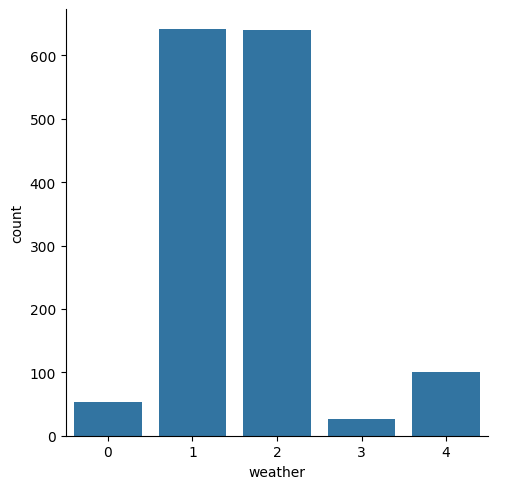

In [919]:
sns.catplot(x="weather", data=df, kind="count")

Since the Dataset is unbalanced, for the Training of the Machine Learning Model, is going to be used only 26 Rows for each Weather Class

In [920]:
df_0 = df[df['weather']==0]
df_1 = df[df['weather']==1]
df_2 = df[df['weather']==2]
df_3 = df[df['weather']==3]
df_4 = df[df['weather']==4]

df_0 = df_0.sample(26)
df_1 = df_1.sample(26)
df_2 = df_2.sample(26)
df_3 = df_3.sample(26)
df_4 = df_4.sample(26)

df_balanced = pd.concat([df_0, df_1, df_2, df_3, df_4])

In [921]:
df_balanced.head()

,precipitation,temp_max,temp_min,wind,weather
385,0.0,3.3,-0.6,2.1,0
1374,0.0,18.3,10.0,2.6,0
282,0.0,16.1,8.9,1.6,0
1282,0.0,29.4,15.6,3.2,0
283,0.0,12.2,8.3,1.4,0


In [922]:
df_balanced.shape

(130, 5)

New Weather Dataset where each Weather Class is balanced.

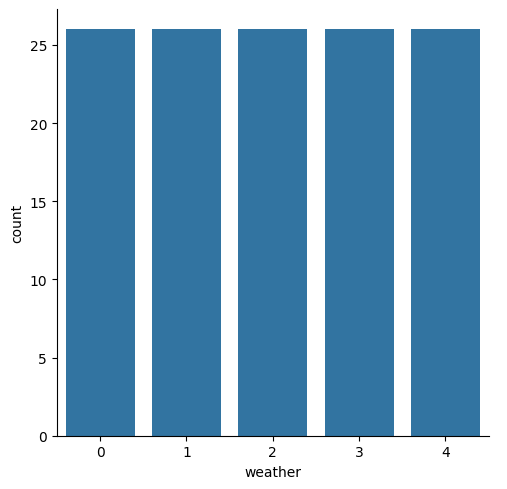

In [923]:
sns.catplot(x="weather", data=df_balanced, kind="count")

In [924]:
row_1 = np.array(["Drizzle", 26])
row_2 = np.array(["Rain", 26])
row_3 = np.array(["Sun", 26])
row_4 = np.array(["Snow", 26])
row_5 = np.array(["Fog", 26])

data = pd.DataFrame([row_1], columns=["Weather", "Number of that Class"])

data.loc[len(data.index)] = row_2
data.loc[len(data.index)] = row_3
data.loc[len(data.index)] = row_4
data.loc[len(data.index)] = row_5

In [925]:
data

,Weather,Number of that Class
0,Drizzle,26
1,Rain,26
2,Sun,26
3,Snow,26
4,Fog,26


In [926]:
data.to_csv(r"C:\Users\sunje\PycharmProjects\WeatherPrediction\.venv\WeatherPredictionML\assets/weather_classes.csv")

Heatmap of the Dataset

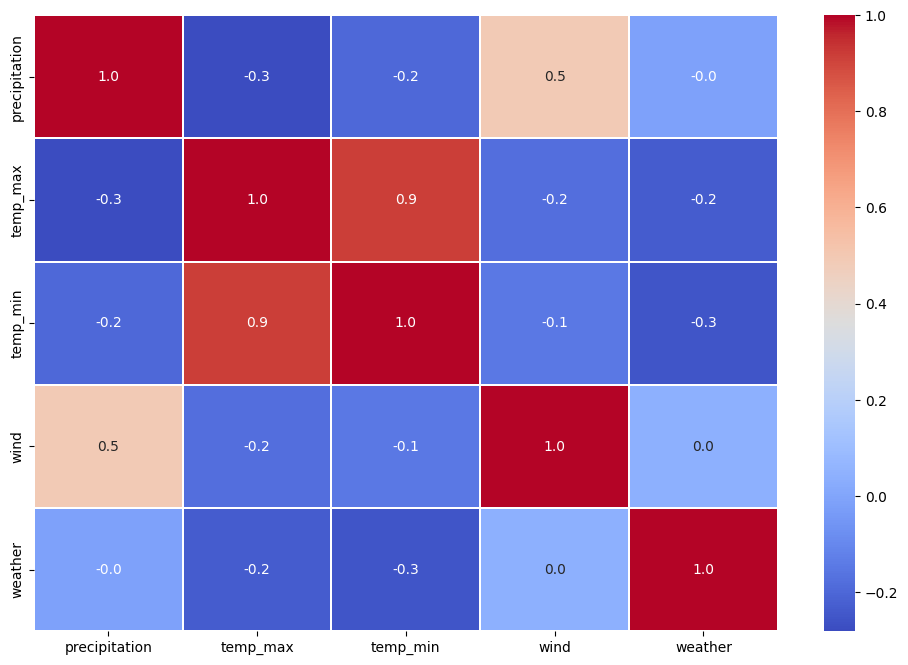

In [927]:
plt.figure(figsize=(12,8))
sns.heatmap(df_balanced.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [928]:
X = df_balanced.iloc[:, 0:-1]
y = df_balanced.iloc[:, -1]

In [929]:
X.head()

,precipitation,temp_max,temp_min,wind
385,0.0,3.3,-0.6,2.1
1374,0.0,18.3,10.0,2.6
282,0.0,16.1,8.9,1.6
1282,0.0,29.4,15.6,3.2
283,0.0,12.2,8.3,1.4


In [930]:
y.head()

385     0
1374    0
282     0
1282    0
283     0
Name: weather, dtype: int64

Splitting the Data to Train and Test Datasets, and then Each X Feature is going to be Scaled.

In [931]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [932]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Importing KNeighborsClassifier Algorithm

In [933]:
knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [934]:
y_predicted = knn_model.predict(X_test)

In [935]:
score = knn_model.score(X_test, y_test)

print('accuracy_score overall :', score)
print('accuracy_score percent :', round(score*100,2))

accuracy_score overall : 0.6153846153846154
accuracy_score percent : 61.54


KNeighborsClassifier Validation Results

In [936]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       0.71      0.83      0.77         6
           2       0.50      0.25      0.33         4
           3       1.00      0.86      0.92         7
           4       0.50      0.50      0.50         4

    accuracy                           0.62        26
   macro avg       0.60      0.57      0.57        26
weighted avg       0.64      0.62      0.62        26



Importing GaussianNB Algorithm

In [937]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

GaussianNB Validation Results

In [938]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.75      1.00      0.86         6
           2       0.67      1.00      0.80         4
           3       1.00      0.71      0.83         7
           4       0.57      1.00      0.73         4

    accuracy                           0.73        26
   macro avg       0.60      0.74      0.64        26
weighted avg       0.63      0.73      0.66        26



C:\Users\sunje\PycharmProjects\WeatherPrediction\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sunje\PycharmProjects\WeatherPrediction\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sunje\PycharmProjects\WeatherPrediction\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Importing SVC Algorithm

In [939]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

SVC Validation Results

In [940]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.83      0.83      0.83         6
           2       0.50      0.75      0.60         4
           3       0.83      0.71      0.77         7
           4       0.50      1.00      0.67         4

    accuracy                           0.65        26
   macro avg       0.53      0.66      0.57        26
weighted avg       0.57      0.65      0.59        26



C:\Users\sunje\PycharmProjects\WeatherPrediction\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sunje\PycharmProjects\WeatherPrediction\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sunje\PycharmProjects\WeatherPrediction\.venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Importing RandomForestClassifier Algorithm

In [941]:
random_forest = RandomForestClassifier()

random_forest.fit(X_train, y_train)

RandomForestClassifier()

RandomForestClassifier Validation Results

In [942]:
y_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.14      0.20      0.17         5
           1       0.67      1.00      0.80         6
           2       0.00      0.00      0.00         4
           3       1.00      0.57      0.73         7
           4       0.20      0.25      0.22         4

    accuracy                           0.46        26
   macro avg       0.40      0.40      0.38        26
weighted avg       0.48      0.46      0.45        26



Importing SGDClassifier Algorithm

SGDClassifier Validation Results

In [943]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.14      0.20      0.17         5
           1       0.67      1.00      0.80         6
           2       0.00      0.00      0.00         4
           3       1.00      0.57      0.73         7
           4       0.20      0.25      0.22         4

    accuracy                           0.46        26
   macro avg       0.40      0.40      0.38        26
weighted avg       0.48      0.46      0.45        26



In conclusion, despite the Best M.L. Algorithm did only 69% of Accuracy, this Results are quite good because the Dataset of each Class is balanced, if the Weather Data is not balanced, the Accuracy may be higher but this is a false and unbiased result.

To improve the Accuracy of the Model, is needed a Weather Dataset more large, and also balanced.

Saving the KNeighborsClassifier Model and the Scaler

In [944]:
import pickle as pkl

In [945]:
pkl.dump(scaler, open(r"C:\Users\sunje\PycharmProjects\WeatherPrediction\.venv\WeatherPredictionML\ModelFiles/scaler.pkl", "wb"))

In [946]:
pkl.dump(nb_model, open(r"C:\Users\sunje\PycharmProjects\WeatherPrediction\.venv\WeatherPredictionML\ModelFiles/weather_model.pkl", "wb"))